In [ ]:
!pip install tensorflow==2.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 458.4 MB 21 kB/s 
     |████████████████████████████████| 14.9 MB 346 kB/s 
     |████████████████████████████████| 132 kB 11.7 MB/s 
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30694 sha256=3d3f4f74b21f828a3e74c3e4184924ae9faf0b75814a407838f102d0d9e177d7
  Stored in directory: /root/.cache/pip/wheels/f1/60/77/22b9b5887bd47801796a856f47650d9789c74dc3161a26d608
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4849 sha256=b8139523fbb8d85ca94ee20dfea96f17f1563c27a8e2ff8da6a151c0d2053f54
  Stored in directory: /root/.cache/pip/wheels/a0/16/9c/5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-cp38-cp38-linux_x86_64.whl size=72345 sha256=eb558a2d4d453bc60790423d535564626dfb0e26944da9e4eb1612e4b02858f0
  Stored in directory: /root/.cache/pip/wheels/5f/fd/

#Part 1

In [ ]:
!pip install -q -U tensorflow-text

     |████████████████████████████████| 4.6 MB 13.3 MB/s 
     |████████████████████████████████| 511.7 MB 7.1 kB/s 
     |████████████████████████████████| 15.7 MB 57.0 MB/s 
     |████████████████████████████████| 1.6 MB 65.7 MB/s 
     |████████████████████████████████| 438 kB 63.3 MB/s 
     |████████████████████████████████| 5.8 MB 65.2 MB/s 
     |████████████████████████████████| 126 kB 67.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install -q -U tf-models official==2.4

ERROR: Could not find a version that satisfies the requirement tf-models (from versions: none)
ERROR: No matching distribution found for tf-models


In [ ]:
!pip install -U tfds-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 5.4 MB/s 
     |████████████████████████████████| 87 kB 5.9 MB/s 


In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.4 MB/s 


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow_addons as tpa
# from official.nlp import optimization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud,STOPWORDS
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential,Model
tf.get_logger().setLevel('ERROR')
import math

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12563723324412119204
xla_global_id: -1
]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
di = '/content/drive/MyDrive/MP Dataset'
fake = pd.read_csv(di+'/Fake.csv')
real = pd.read_csv(di+'/True.csv')
fake['label'] = 1
real['label'] = 0
df = pd.concat([real,fake])
df.reset_index(inplace=True,drop=True)
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
df.shape

(44898, 5)

Text(0.5, 1.0, 'Source of News')

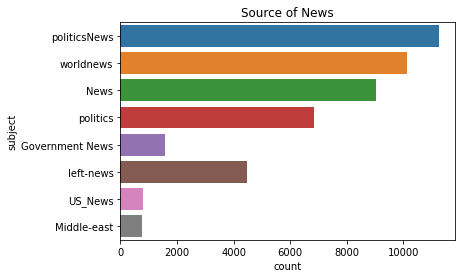

In [ ]:
sns.countplot(y='subject',data=df)
plt.title("Source of News")

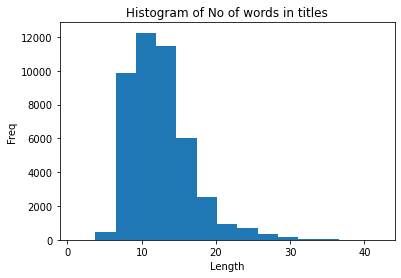

In [ ]:
plt.hist([len(x.split()) for x in df['title']],bins=15)
plt.title("Histogram of No of words in titles")
plt.xlabel("Length")
plt.ylabel("Freq")
plt.show()

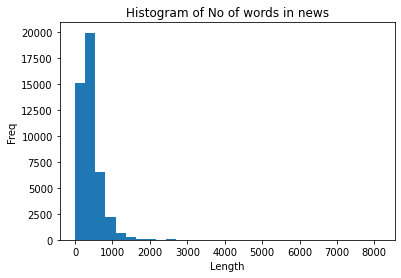

In [ ]:
plt.hist([len(x.split()) for x in df['text']],bins=30)
plt.title("Histogram of No of words in news")
plt.xlabel("Length")
plt.ylabel("Freq")
plt.show()

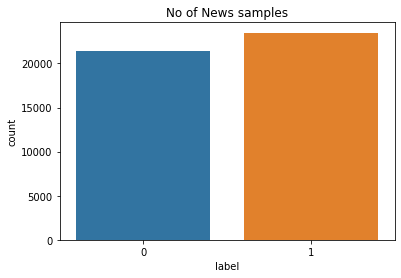

In [ ]:
# plt.figure(figsize=(16,8))
sns.countplot(x='label',data=df)

plt.title("No of News samples")

plt.show()


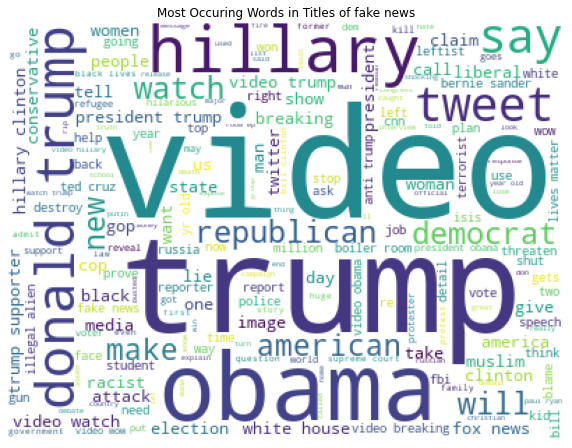

In [ ]:
twords = ' '.join(txt.lower() for txt in df.loc[df['label']==1,:].title)
stopwords = set(STOPWORDS)

plt.figure(figsize=(10,8))
wc = WordCloud(stopwords=stopwords,background_color='white',height=300).generate(twords)
plt.imshow(wc)
plt.axis('off')
plt.title("Most Occuring Words in Titles of fake news")
plt.show()

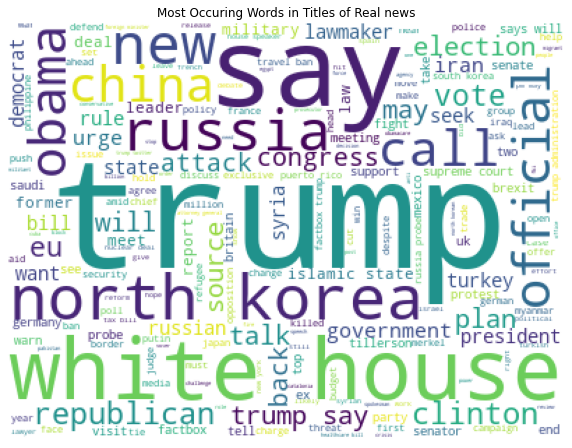

In [ ]:
twords = ' '.join(txt.lower() for txt in df.loc[df['label']==0,:].title)
stopwords = set(STOPWORDS)

plt.figure(figsize=(10,8))
wc = WordCloud(stopwords=stopwords,background_color='white',height=300).generate(twords)
plt.imshow(wc)
plt.axis('off')
plt.title("Most Occuring Words in Titles of Real news")
plt.show()

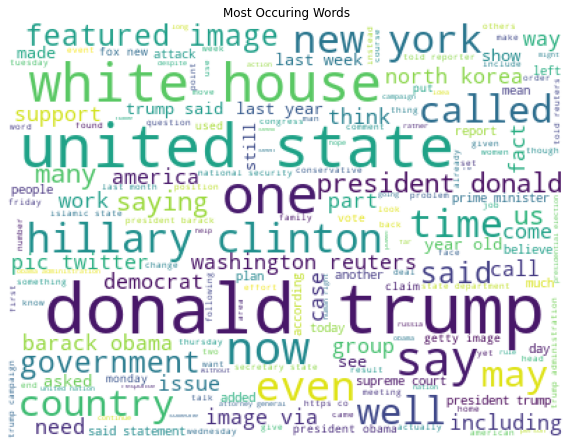

In [ ]:
words = ' '.join(txt.lower() for txt in df.text)
stopwords = set(STOPWORDS)

plt.figure(figsize=(10,8))
wc = WordCloud(stopwords=stopwords,background_color='white',height=300).generate(words)
plt.imshow(wc)
plt.axis('off')
plt.title("Most Occuring Words")
plt.show()

In [ ]:
df.text = df.text.str.replace("\s+"," ")
df.text = df.text.str.replace("[wW]{3}","")
df.text = df.text.str.replace("http\S+","")
df.text = df.text.str.replace("[^a-zA-Z\.\s\']","")
df.text = df.text.str.replace("\s+[a-zA-Z]\s+"," ")
df.text = df.text.str.replace("\w(\')\s|\s(\')\w'",'')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist

In [ ]:
df.title = df.title.str.replace("\s+"," ")
df.title = df.title.str.replace("[wW]{3}","")
df.title = df.title.str.replace("http\S+","")
df.title = df.title.str.replace("[^a-zA-Z\.\s\']","")
df.title = df.title.str.replace("\s+[a-zA-Z]\s+"," ")
df.title = df.title.str.replace("\w(\')\W|\W(\')\w'",'')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist

In [ ]:
train,test = train_test_split(df,train_size=0.8,random_state=1,shuffle=True)

In [ ]:
train.reset_index(inplace=True,drop=True)
test.reset_index(inplace = True,drop=True)
train.head()

,title,text,subject,date,label
0,Iran nuclear deal must change if U.S. to stay ...,UNITED NATIONS Reuters The Iran nuclear deal ...,worldnews,"September 19, 2017",0
1,Donald Trump Tried To Manipulate Stock Market...,Donald Trump hates Jeff Bezos the CEO of Amazo...,News,"August 16, 2017",1
2,NEW POLL SHOWS DEMOCRATS Under Prefer Old Whi...,Nah nah nah nah hey hey hey good bye Support f...,politics,"Jan 20, 2016",1
3,Bigot Christians Make HILARIOUSLY AWFUL AntiT...,Ever since Target decided to stand up to trans...,News,"May 24, 2016",1
4,Google Maps HILARIOUSLY Trolls Trump Hell Be...,Donald Trump pride and joy is the tacky gaudy ...,News,"November 26, 2016",1


In [ ]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess = hub.load(tfhub_handle_preprocess)
tok = bert_preprocess.tokenize(tf.constant(['hello world']))
tok

<tf.RaggedTensor [[[7592],
  [2088]]]>

In [ ]:
MAX_LEN = max([len(x.split()) for x in train.title])
MAX_LEN

40

In [ ]:
text_preprocessed = bert_preprocess.bert_pack_inputs([tok], tf.constant(20))

print('Shape Word Ids : ', text_preprocessed['input_word_ids'].shape)
print('Word Ids       : ', text_preprocessed['input_word_ids'][0, :16])
print('Shape Mask     : ', text_preprocessed['input_mask'].shape)
print('Input Mask     : ', text_preprocessed['input_mask'][0, :16])
print('Shape Type Ids : ', text_preprocessed['input_type_ids'].shape)
print('Type Ids       : ', text_preprocessed['input_type_ids'][0, :16])

Shape Word Ids :  (1, 20)
Word Ids       :  tf.Tensor(
[ 101 7592 2088  102    0    0    0    0    0    0    0    0    0    0
    0    0], shape=(16,), dtype=int32)
Shape Mask     :  (1, 20)
Input Mask     :  tf.Tensor([1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0], shape=(16,), dtype=int32)
Shape Type Ids :  (1, 20)
Type Ids       :  tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(16,), dtype=int32)


In [ ]:
tfhub_handle_encoder

'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'

In [ ]:
def preprocess_texts(input_string,seq_length = MAX_LEN):
  input_segments = [
      tf.keras.layers.Input(shape=(), dtype=tf.string, name=i)
      for i in input_string]

  bert_preprocess = hub.load(tfhub_handle_preprocess)
  tokenizer = hub.KerasLayer(bert_preprocess.tokenize, name='tokenizer')
  segments = [tokenizer(s) for s in input_segments]

  packer = hub.KerasLayer(bert_preprocess.bert_pack_inputs,
                          arguments=dict(seq_length=seq_length),
                          name='packer')
  model_inputs = packer(segments)
  
  return tf.keras.Model(input_segments, model_inputs)


In [ ]:
model_preprocessor = preprocess_texts(['string1'])

In [ ]:
model_preprocessor(np.array(["The golden retriever loved the fireworks each Fourth of July."]))

{'input_mask': <tf.Tensor: shape=(1, 40), dtype=int32, numpy=
 array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       dtype=int32)>,
 'input_type_ids': <tf.Tensor: shape=(1, 40), dtype=int32, numpy=
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       dtype=int32)>,
 'input_word_ids': <tf.Tensor: shape=(1, 40), dtype=int32, numpy=
 array([[  101,  1996,  3585, 12850,  2099,  3866,  1996, 16080,  2169,
          2959,  1997,  2251,  1012,   102,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0]], dtype=int32)>}

In [ ]:
def text_classifier(num_classes,model_preprocessor):
  inputs = model_preprocessor.input
  x = model_preprocessor(inputs)
  bert_encoder = hub.KerasLayer(tfhub_handle_encoder,trainable=True,name = 'bert_encoder')
  x = bert_encoder(x)
  cls = x['pooled_output']
  cls = tf.keras.layers.LayerNormalization()(cls)
  cls = tf.keras.layers.Dense(512,activation='relu')(cls)
  cls = tf.keras.layers.Dropout(0.2)(cls)
  out = tf.keras.layers.Dense(num_classes,activation = 'softmax')(cls)
  return tf.keras.Model(inputs,out)


In [ ]:
model = text_classifier(2,model_preprocessor)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 string1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 model (Functional)             {'input_type_ids':   0           ['string1[0][0]']                
                                (None, 40),                                                       
                                 'input_word_ids':                                                
                                (None, 40),                                                       
                                 'input_mask': (Non                                               
                                e, 40)}                                                     

In [ ]:
model(np.array(['The golden retriever loved the fireworks each Fourth of July.'])).numpy()

array([[0.6236331 , 0.37636688]], dtype=float32)

In [ ]:
xtitle = train[['title']].to_numpy()
ytitle = train[['label']].to_numpy()
xval = test[['title']].to_numpy()
yval = test[['label']].to_numpy()
print(xtitle[:5])
ytitle[:5]

[['Iran nuclear deal must change if U.S. to stay Tillerson']
 [' Donald Trump Tried To Manipulate Stock Market Against One American Company It Worked For Few Hours']
 ['NEW POLL SHOWS DEMOCRATS Under  Prefer Old White Marxists To Serial Criminals In Pants Suits']
 [' Bigot Christians Make HILARIOUSLY AWFUL AntiTrans Music Video To Boycott Target VIDEO']
 [' Google Maps HILARIOUSLY Trolls Trump  Hell Be FURIOUS IMAGES']]


array([[0],
       [1],
       [1],
       [1],
       [1]])

In [ ]:
# model.save('/content/drive/MyDrive/MP4')

#Exec

In [ ]:
model.load_weights('/content/drive/MyDrive/MP4/')

In [ ]:
pip install transformers[tf-cpu]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 5.0 MB/s 
     |████████████████████████████████| 596 kB 56.4 MB/s 
     |████████████████████████████████| 6.6 MB 41.7 MB/s 
     |████████████████████████████████| 86 kB 5.2 MB/s 
     |████████████████████████████████| 78 kB 6.8 MB/s 
     |████████████████████████████████| 440 kB 59.3 MB/s 
     |████████████████████████████████| 207.4 MB 68 kB/s 
     |████████████████████████████████| 12.8 MB 14.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
#from scipy import optimization
epochs = 3
batch_size = 32
init_lr = 2e-5
steps_per_epoch = xtitle.shape[0]//batch_size
train_steps = steps_per_epoch*epochs
warmup_steps = train_steps//10

optimizer = optimization.create_optimizer(
      init_lr=init_lr,
      num_train_steps=train_steps,
      num_warmup_steps=warmup_steps,
      optimizer_type='adamw')

callback = [tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/MP4/',monitor='val_acc',save_weights_only=True)]
model.compile(optimizer=optimizer,loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['acc'])



NameError: ignored

In [ ]:
hist = model.fit(xtitle,ytitle,batch_size=batch_size,epochs=epochs,callbacks=callback,validation_data=(xval,yval))

NameError: ignored

In [ ]:
model.evaluate(xval,yval,batch_size=batch_size)

NameError: ignored

In [ ]:
loss = hist.history['loss']
acc=  hist.history['acc']
val_loss = hist.history['val_loss']
val_acc = hist.history['val_acc']

plt.figure(figsize=(14,6))
plt.title("Metrics")
plt.subplot(121)
plt.plot(range(1,epochs+1),loss,color='blue')
plt.plot(range(1,epochs+1),val_loss,color='green')
plt.legend(labels = ['loss','val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss")
plt.subplot(122)
plt.plot(range(1,epochs+1),acc,color='red')
plt.plot(range(1,epochs+1),val_acc,color='orange')
plt.legend(labels = ['accuracy','val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.suptitle("Metrics")
plt.show()

NameError: ignored

In [ ]:
def ypred(xval,model):
  y = model.predict(xval)
  y = np.argmax(y,axis=1)
  return y
lis = ['Real','Fake']

def predict(x,model):
  x = np.array(x)
  if x.shape[0]<2:
    x = np.expand_dims(x,axis=0)
  y = model.predict(x)
  y = np.apply_along_axis(lambda x:lis[np.argmax(x)],1,y).squeeze()
  return y.tolist()

281/281 [==============================] - 228s 810ms/step


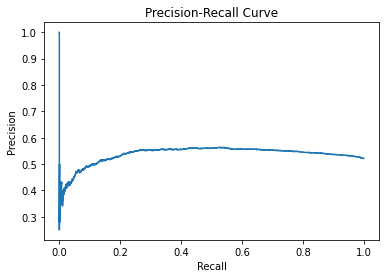

In [ ]:
from sklearn.metrics import precision_recall_curve
y_pred = model.predict(xval)
precision,recall,thresholds = precision_recall_curve(yval,y_pred[:,1])

plt.plot(recall,precision)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


281/281 [==============================] - 203s 723ms/step


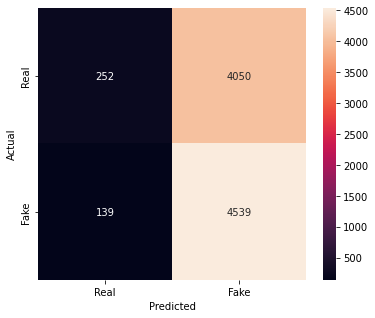

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import pandas as pd

yval_pred = ypred(xval,model)
cm = confusion_matrix(yval,yval_pred)
plt.figure(figsize=(6,5))
df = pd.DataFrame(cm,index = ['Real','Fake'],columns=['Real','Fake'])
sns.heatmap(df,annot=True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

In [ ]:
df

,Real,Fake
Real,252,4050
Fake,139,4539


In [ ]:
print(classification_report(yval,yval_pred,target_names=['Real','Fake']))

              precision    recall  f1-score   support

        Real       0.64      0.06      0.11      4302
        Fake       0.53      0.97      0.68      4678

    accuracy                           0.53      8980
   macro avg       0.59      0.51      0.40      8980
weighted avg       0.58      0.53      0.41      8980



In [ ]:
predict(['Twitter Cracks Down On Misinformation Over Vaccine, Begins Labelling Tweets',
         'Donald Trump Tried To Manipulate Stock Market Against One American Company It Worked For Few Hours',
         'North Korea seen moving missiles from development center South Korean broadcaster',
         'Bombs kill Pakistani soldiers hunting U.S.Canadian family\'s kidnappers',
         'Mamata Banerjee wins Bengal, but loses Nandigram to Suvendu Adhikari',
         'Google Maps HILARIOUSLY Trolls Trump  Hell Be FURIOUS IMAGES',
         'Consider Lockdown To Curb 2nd Covid Wave: Supreme Court To Centre, States'],model)

1/1 [==============================] - 1s 724ms/step


['Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake']

In [ ]:
train.loc[train['label']==1,'title'].head().to_numpy()

array([' Donald Trump Tried To Manipulate Stock Market Against One American Company It Worked For Few Hours',
       'NEW POLL SHOWS DEMOCRATS Under  Prefer Old White Marxists To Serial Criminals In Pants Suits',
       ' Bigot Christians Make HILARIOUSLY AWFUL AntiTrans Music Video To Boycott Target VIDEO',
       ' Google Maps HILARIOUSLY Trolls Trump  Hell Be FURIOUS IMAGES',
       'BREAKING Wikileaks Releases Vault  Part   Year Zero'],
      dtype=object)

In [ ]:
model.predict(np.array(['Donald Trump Tried To Manipulate Stock Market Against One American Company It Worked For Few Hours','Donald Trump Tried To Manipulate Stock Market Against One American Company It Worked For Few Hours']))

1/1 [==============================] - 0s 96ms/step


array([[0.2278746 , 0.77212536],
       [0.2278746 , 0.77212536]], dtype=float32)

In [ ]:
from flask import Flask 

from flask_ngrok import run_with_ngrok 

app = Flask(__name__) 
run_with_ngrok(app)    

  

@app.route("/") 

def home(): 

    return "<h1>GFG is great platform to learn</h1>"

    
app.run()

ModuleNotFoundError: ignored

In [ ]:
# export LC_ALL="en_US.UTF-8"
# export LC_CTYPE="en_US.UTF-8"
import locale

print(loc)
locale.setlocale(locale.LC_ALL,loc)

def getCurrency(amount):
    locale.setlocale(locale.LC_ALL,loc)
    return locale.currency(amount, grouping=True)
# print(getCurrency(20))
# print("Total:{:>41}".format(getCurrency(30)))
getCurrency(1)

en_US.UTF-8


'$1.00'